# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 10
### Dyskretna Transformacja Fouriera
#### Mateusz Surjak

In [1]:
import numpy as np
import time
from scipy import linalg
from matplotlib import pyplot as plt

## Zadanie 1 FFT

Zaimplementowałem funkcje dokonującą DFT.

In [2]:
def DFT(x):
    n = len(x)
    func = lambda i,k: np.exp(-2*np.pi*1j*i*k/n)
    F = []
    # tworzenie macierzy F
    for k in range(n):
        F.append([func(i,k) for i in range(n)])
    F = np.array(F)
    y = F@x
    return y, F

Następnie zdefiniowałem funkcje realizującą IDFT w celu sprawdzenia poprawności implementacji.

In [3]:
def IDFT(f, y):
    n = len(y)
    return (np.conjugate(f)@y) / n

Poniżej znajduje się funkcja sprawdzająca poprawność implementacji. Nie znalazłem w bibliotekach numerycznych funkcji działającej na algorytmie DFT, więc wyniki porównam bezpośrednio z funkcją realizującą FFT.

In [4]:
def check_DFT():
    x_range = [2**a for a in range(10)]
    for n in x_range: 
        x = np.random.rand(n)
        y,F = DFT(x)
        y_lib = np.fft.fft(x)
        x_idft = IDFT(F,y)
        x_lib_idft= np.fft.ifft(y)
        print(f"""
              Dla N = {n}
              Poprawność DFT zbadana za pomoca IDFT: {np.allclose(x, x_idft)}
              Poprawność DFT w porównaniu z funkcją biblioteczana: {np.allclose(y,y_lib)}
              Poprawność IDFT w porónaniu z funkcją biblioteczną: {np.allclose(x_idft, x_lib_idft)}
              """)

In [5]:
check_DFT()


              Dla N = 1
              Poprawność DFT zbadana za pomoca IDFT: True
              Poprawność DFT w porównaniu z funkcją biblioteczana: True
              Poprawność IDFT w porónaniu z funkcją biblioteczną: True
              

              Dla N = 2
              Poprawność DFT zbadana za pomoca IDFT: True
              Poprawność DFT w porównaniu z funkcją biblioteczana: True
              Poprawność IDFT w porónaniu z funkcją biblioteczną: True
              

              Dla N = 4
              Poprawność DFT zbadana za pomoca IDFT: True
              Poprawność DFT w porównaniu z funkcją biblioteczana: True
              Poprawność IDFT w porónaniu z funkcją biblioteczną: True
              

              Dla N = 8
              Poprawność DFT zbadana za pomoca IDFT: True
              Poprawność DFT w porównaniu z funkcją biblioteczana: True
              Poprawność IDFT w porónaniu z funkcją biblioteczną: True
              

              Dla N = 16
          

Jako że algorytm DFT jest wolny - ma złożoność $n^2$, powstał algorytm FFT -  Fast Fourier Transform - Cooleya-Turkeya  działający na metodzie "dziel i zwyciężaj" i mający złożoność $nlog(n)$

Poniżej prezentuje implementacje alforytmu FFT.

In [6]:
def FFT(x):
    n = len(x)
    if n == 1:
        return x
    even = FFT(x[0::2])
    odd = FFT(x[1::2])
    func = lambda k: np.exp(-2.j*np.pi*k/n)
    M = [func(k)*odd[k] for k in range(int(n/2))]
    return [even[k] + M[k] for k in range(int(n/2))] + [even[k] - M[k] for k in range(int(n/2))]

In [7]:
def check_FFT():
    x_range = [2**a for a in range(2,12)]
    for n in x_range:
        x = np.random.rand(n)
        
        start_time = time.time()
        y = FFT(x)
        end_time = time.time()
        
        start_time_lib = time.time()
        y_lib = np.fft.fft(x)
        end_time_lib = time.time()

        start_multiply = time.time()
        y_mult = DFT(x)
        end_multiply = time.time()
        print(f"""
              Dla N = {n}
              Poprawność FFT w porównaniu z funkcją biblioteczana: {np.allclose(y,y_lib)}
              Czas własnej implementacji FFT: {end_time - start_time}
              Czas bibliotecznej implementacji FFT: {end_time_lib - start_time_lib}
              Czas własnej implementacji DFT: {end_multiply - start_multiply}
              """)



In [8]:
check_FFT()


              Dla N = 4
              Poprawność FFT w porównaniu z funkcją biblioteczana: True
              Czas własnej implementacji FFT: 0.0002484321594238281
              Czas bibliotecznej implementacji FFT: 0.0008227825164794922
              Czas własnej implementacji DFT: 0.00027561187744140625
              

              Dla N = 8
              Poprawność FFT w porównaniu z funkcją biblioteczana: True
              Czas własnej implementacji FFT: 0.0003495216369628906
              Czas bibliotecznej implementacji FFT: 0.0003349781036376953
              Czas własnej implementacji DFT: 0.0005753040313720703
              

              Dla N = 16
              Poprawność FFT w porównaniu z funkcją biblioteczana: True
              Czas własnej implementacji FFT: 0.0007328987121582031
              Czas bibliotecznej implementacji FFT: 0.00022649765014648438
              Czas własnej implementacji DFT: 0.0018434524536132812
              

              Dla N = 32
     

## Wnioski
- Algotytm FFT z biblioteki numpy okazał się zdecydowanie najszybszy
- ALforytm FFT ma złożoność nlog(n), przez co jest znacznie szybszy niż DFT (n^2)
- Dzięki szybkiej transformacie Fouriera (FFT) praktycznie możliwe stało się cyfrowe przetwarzanie sygnałów (DSP), oraz zastosowanie dyskretnych transformat kosinusowych (DCT) do kompresji danych audio-wideo

## Zadanie 2 DFT w 1D

Poniżej prezentuje funkcje generujące sygnały sinusoidalne.

-  Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach

In [9]:
def generate_signal_sum_5():
    x = np.arange(0, 100, 0.5)
    sig1 = np.sin(x)
    sig2 = np.sin(x / 2)
    sig3 = np.sin(3*x / 4)
    sig4 = np.sin(2*x)
    sig5 = np.sin(x/4)
    return x , sig1 + sig2 + sig3 + sig4 + sig5

- Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co wyżej, ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości

In [10]:
def get_interval_signal():
    x = np.arange(0, 100, 0.5)
    n = len(x)
    y = np.empty(n)
    y[:(n//5)] = np.sin(x[:(n//5)])
    y[(n//5):(2 * (n // 5))] = np.sin(x[(n//5):(2 * (n // 5))] / 2)
    y[(2 * (n // 5)):(3 * (n // 5))] = np.sin(3*x[(2 * (n // 5)):(3 * (n // 5))] / 4)
    y[(3 * (n // 5)):(4 * (n // 5))] = np.sin(2*x[(3 * (n // 5)):(4 * (n // 5))])
    y[(4 * (n // 5)):] = np.sin(x[(4 * (n // 5)):] / 4)
    return x,y

## Analiza pierwszego sygnału:

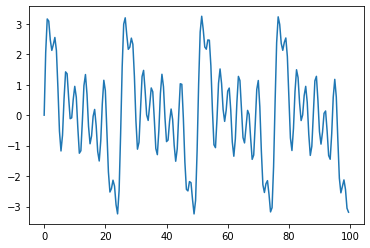

In [11]:
x, y = generate_signal_sum_5()
plt.plot(x,y)
plt.show()

Transformacja sygnału pierwszego do domeny częstotliwościowej

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


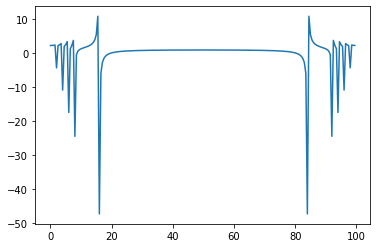

In [14]:
y1, f1 = DFT(y)
plt.plot(x, y1)
plt.show()

### Wniosek:
Sygnał jest zadany w dziedzinie czasu. Analiza Fouriera pozwala nam wyrazić sygnał jako ważoną sumę przesuniętych w fazie sinusoid o różnych częstotliwościach. Wagi i fazy odpowiadające poszczególnym częstotliwościom charakteryzują sygnał w dziedzinie częstotliwości. Sygnał wejściowy składał się z sumy pięciu sygnałów, otrzymaliśmy 5 "pików" po transformacie fouriera. Wartości na osi X-owej odpowiadają czestotliwością poszczególnych sygnałów wejściowych.

Część rzeczywista transformacji

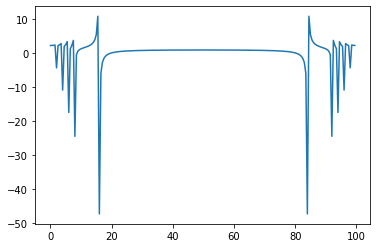

In [15]:
plt.plot(x, np.real(y1))
plt.show()

Część rzeczywista pokrywa się z wykresem transformaty.

Część urojona transformacji

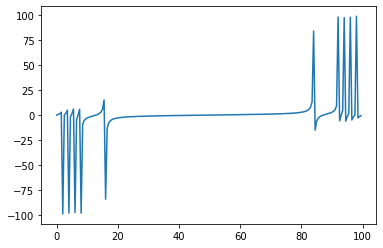

In [16]:
plt.plot(x, np.imag(y1))
plt.show()

## Analiza drugiego sygnału:

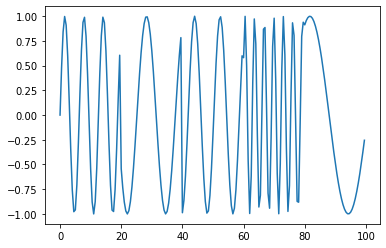

In [17]:
x, y = get_interval_signal()
plt.plot(x,y)
plt.show()

Transformacja sygnału drugiego do domeny częstotliwościowej

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


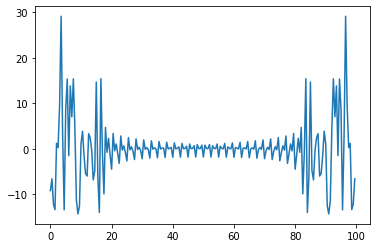

In [18]:
y2, f2 = DFT(y)
plt.plot(x, y2)
plt.show()

Część rzeczywista transformacji

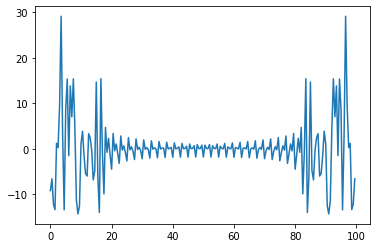

In [19]:
plt.plot(x, np.real(y2))
plt.show()

Część urojona transformacji

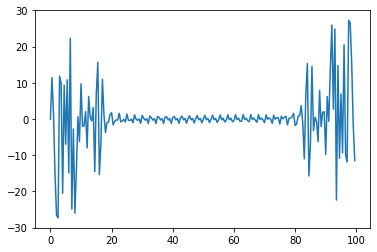

In [20]:
plt.plot(x, np.imag(y2))
plt.show()

## Wnioski:
- Transformata Fouriera jest podstawowym narzędziem analizy harmonicznej i przetwarzania sygnału. 
- Transformacja Fouriera rozkłada funkcję okresową na
szereg funkcji okresowych tak, że uzyskana transformata
podaje w jaki sposób poszczególne częstotliwości składają
się na pierwotną funkcję.
- Transformata Fouriera przetwarza funkcję z danej przestrzeni w ten sposób, że wyeksponowane są jej własności okresowe, częstotliwościowe (tak zwane spektrum funkcji).
- Wspomniane przekształcenie jest bezstratne, i funkcja może zostać zrekonstruowana ze swojej transformaty Fouriera.

## Dodatkowe zjawisko

Czytając o FFT natknąłem się na jeszcze jedno ciekawe zjawisko które przedstawię.
Mamy sygnał złożony z jakiś innych sygnałów, wezmę dwa bo prościej będzie pokazać.

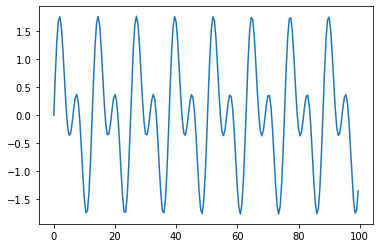

In [23]:
x = np.arange(0, 100, 0.5)
sig1 = np.sin(x)
sig2 = np.sin(x / 2)
signal = sig1 + sig2
plt.plot(x,signal)
plt.show()

DFT tego sygnału będzie wyglądać następująco

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


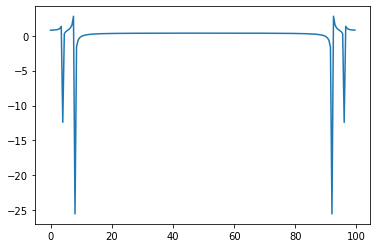

In [22]:
x = np.arange(0, 100, 0.5)
sig1 = np.sin(x)
sig2 = np.sin(x / 2)
signal = sig1 + sig2
y, F = DFT(signal)
plt.plot(x,y)
plt.show()

Natomiast jeśli policzymy DFT dla każdego sygnału z osobna otrzymamy poniższy wykres

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


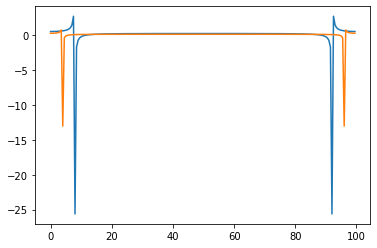

In [27]:
y1, F1 = DFT(sig1)
plt.plot(x,y1)
y2, F2 = DFT(sig2)
plt.plot(x,y2)
plt.show()

Jeśli dodamy do siebie powyższe wykresy DFT dla każdego sygnału to otrzymamy wykres identyczny jakbyśmy dodali sygnały na początku i przeliczyli ich DFT. Wykresy się nakładają na siebie dlatego widać tylko jeden kolor na poniższym wykresie. Są indetyczne.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


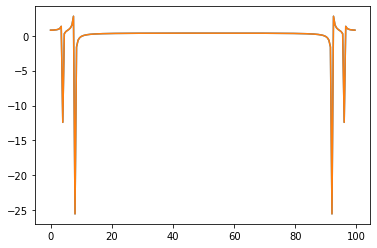

In [29]:
plt.plot(x, y1+y2)
plt.plot(x,y)
plt.show()